# Imports and Data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import phonecalls as pc
import scipy.stats as stats
import scipy.interpolate as interpol
import time
import copy
import math
import pickle


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

with open('unfiltered.pkl', 'rb') as handle:
    unfiltered = pickle.load(handle)
handle.close()

with open('filtered.pkl', 'rb') as handle:
    filtered = pickle.load(handle)
handle.close()

with open('filterednc.pkl', 'rb') as handle:
    filterednc = pickle.load(handle)
handle.close()

import statsmodels.api as sm

globalt0 = dt.datetime.now()

# Supplemental Information

This section recreates all plots for the SI with the data exports to create the plots in TiKz

In [2]:
loss = {}
loss[0] = len(pc.pairs(unfiltered['all']))
callT = {}
df = unfiltered['all']
for T in [150, 200, 250, 300, 350, 400, 450]:
    callT[T] = df.loc[df['aclock'] <= T]
    
for T in callT.keys():
    uno = pd.DataFrame()
    maxt = max(callT[T]['uclock'])
    for ego in callT[T]['ego'].unique():
        df = callT[T].loc[callT[T]['ego'] == ego]
        for alter in df['alter'].unique():
            df2 = df.loc[df['alter'] == alter]
            mint = min(df2['uclock'])
            if mint < (maxt - T):
                df2.loc[:, 'aclock'] = df2['uclock'] - mint
                uno = uno.append(df2).reset_index(drop=True)
    pair = pc.pairs(uno)
    loss[T] = len(pair)
    callT[T] = uno

/home/vsvh/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [3]:
# sup1 = {}
# for T in [150, 200, 250, 300]:
#     dff = pc.get_f(callT[T], 'all', 10, (T//3) + 1)
#     b = pc.get_b(dff, 'alpha')
#     sup1[T] = pc.plot_g(b, 'alpha')

In [4]:
# plt.figure(figsize=(32, 16))
# labels = ['Short Lives', 'Middle Lives', 'Long Lives', 'ccc']
# p = 1
# for T in sup1.keys():
#     plt.subplot(2,2,p)
#     plt.xlabel(f"Lapse in 10 day bins. Max T = {T}")
#     plt.ylabel(fr"Calls to each alter during 10 days.")
#     for l in sup1[T].keys():
#         plt.plot(sup1[T][int(l)].index, sup1[T][l]['alpha'], marker=markers[int(l)], markersize=15, ls="--", label=labels[int(l)])
#     plt.legend()
#     p += 1
# #plt.savefig("../commpatterns/img/supp/allt.png", dpi=150)

In [5]:
# for T in sup1.keys():
#     tmp = pd.DataFrame()
#     for l in sup1[T].keys():
#         df = sup1[T][l]
#         df.columns = [f'l{int(l)}']
#         if len(tmp) == 0:
#             tmp = tmp.append(df)
#         else:
#             tmp = tmp.merge(df, left_index=True, right_index=True, how='outer')
#     tmp.index.rename('a', inplace=True)
#     tmp.fillna('nan', inplace=True)
#     tmp.to_csv(f"../commpatterns/PNAS_paper/SI/figs/s1_{T}.dat", header=True, sep="\t")

In [6]:
# survT = {}
# for T in [150, 200, 250, 300]:
#     ddf = pc.get_f(callT[T], 'all', 30, 10)
#     survT[T] = pc.get_survival(ddf)

In [7]:
# plt.figure(figsize=(32, 16))
# p = 1
# for T in survT.keys():
#     plt.subplot(2,2,p)
#     plt.xlabel(f"Lifetime in 10 day bins. Max T = {T}")
#     plt.ylabel(fr"Survival probability")
#     plt.xticks(range(0, 301, 20))
#     plt.xlim(-10, 310)
#     for gamma in range(6):
#         plt.plot([10 * x for x in survT[T][int(gamma)].index], survT[T][int(gamma)][0], marker=markers[int(gamma)], markersize=15, ls="--", label=fr'$\gamma = {gamma}$')
#     plt.legend()
#     p += 1
# #plt.savefig("../commpatterns/img/supp/survt.pdf", dpi=150)

In [8]:
# for T in survT.keys():
#     tmp = pd.DataFrame({'lc': list(survT[T][0].index)})
#     for s in range(6):
#         df = survT[T][s]
#         tmp[f'p{int(s)}'] = df[0]
#     tmp.to_csv(f'../commpatterns/PNAS_paper/SI/figs/s2_{T}.dat', header=False, index=False, sep="\t")

## Individual results for each cohort

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


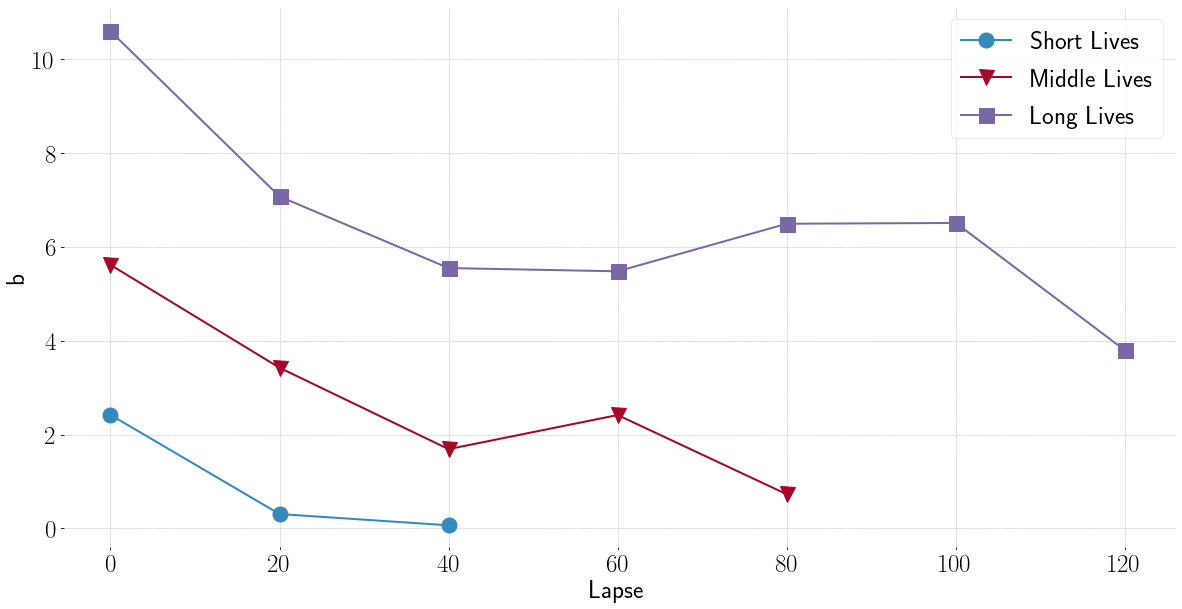

In [9]:
labels = ['Short Lives', 'Middle Lives', 'Long Lives']
uk2calls = filtered['uk2']
uk2dff = pc.get_f(uk2calls, 'all', 30, 67)
b = pc.get_b(uk2dff, 'alpha')
uk2stable = pc.plot_g(b, 'alpha')

plt.xlabel("Lapse")
plt.ylabel("b")
for lamb in uk2stable.keys():
    l = int(lamb)
    plt.plot([20 * x for x in uk2stable[l].index], uk2stable[l]['alpha'], marker=markers[l], markersize=15, label=labels[l])
plt.legend()

In [10]:
calls = {}
for c in ['uk2', 'uk', 'mit']:    
    df = unfiltered[c].loc[unfiltered[c]['aclock'] <= 200]
#     if c != 'uk2':
#         une = df.groupby('ego')[['uclock']].min()
#         deux = pd.DataFrame()
#         for ego in df['ego'].unique():
#             tmp = df.loc[df['ego'] == ego]
#             minday = une.loc[ego]['uclock'] + 10
#             df1 = df.loc[df['uclock'] >= minday]
#             deux = deux.append(df1).reset_index(drop=True)
#         df = deux
    uno = pd.DataFrame()
    T = max(df['uclock'])
    for ego in df['ego'].unique():
        df1 = df.loc[df['ego'] == ego]
        for alter in df1['alter'].unique():
            df2 = df1.loc[df1['alter'] == alter]
            mint = min(df2['uclock'])
            if mint < (T - 200):
                df2.loc[:, 'aclock'] = df2['uclock'] - mint
                uno = uno.append(df2).reset_index(drop=True)
    calls[c] = uno
    print(f"done with {c}")
    
alldff = {}
for c in calls.keys():
    alldff[c] = pc.get_f(calls[c], 'all', 7, 67)
    
# with open('../itdata/mtl1_lambda_alpha_fig2.pickle', 'rb') as handle:
#     it1 = pickle.load(handle)
#     handle.close()
    
# with open('../itdata/mtl2_lambda_alpha_fig2.pickle', 'rb') as handle:
#     it2 = pickle.load(handle)
#     handle.close()
    
# alldff['it'] = {}
# data = [it1, it2]
# dname = ['it1', 'it2']
# for c in range(2):
#     for ego in data[c].keys():
#         key = f'{dname[c]}{ego}'
#         alldff['it'][key] = data[c][ego]

/home/vsvh/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


done with uk2


/home/vsvh/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


done with uk


/home/vsvh/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


done with mit


/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


In [11]:
stablec = {}
for c in alldff.keys():
    b = pc.get_b(alldff[c], 'alpha')
    stablec[c] = pc.plot_g(b, 'alpha')

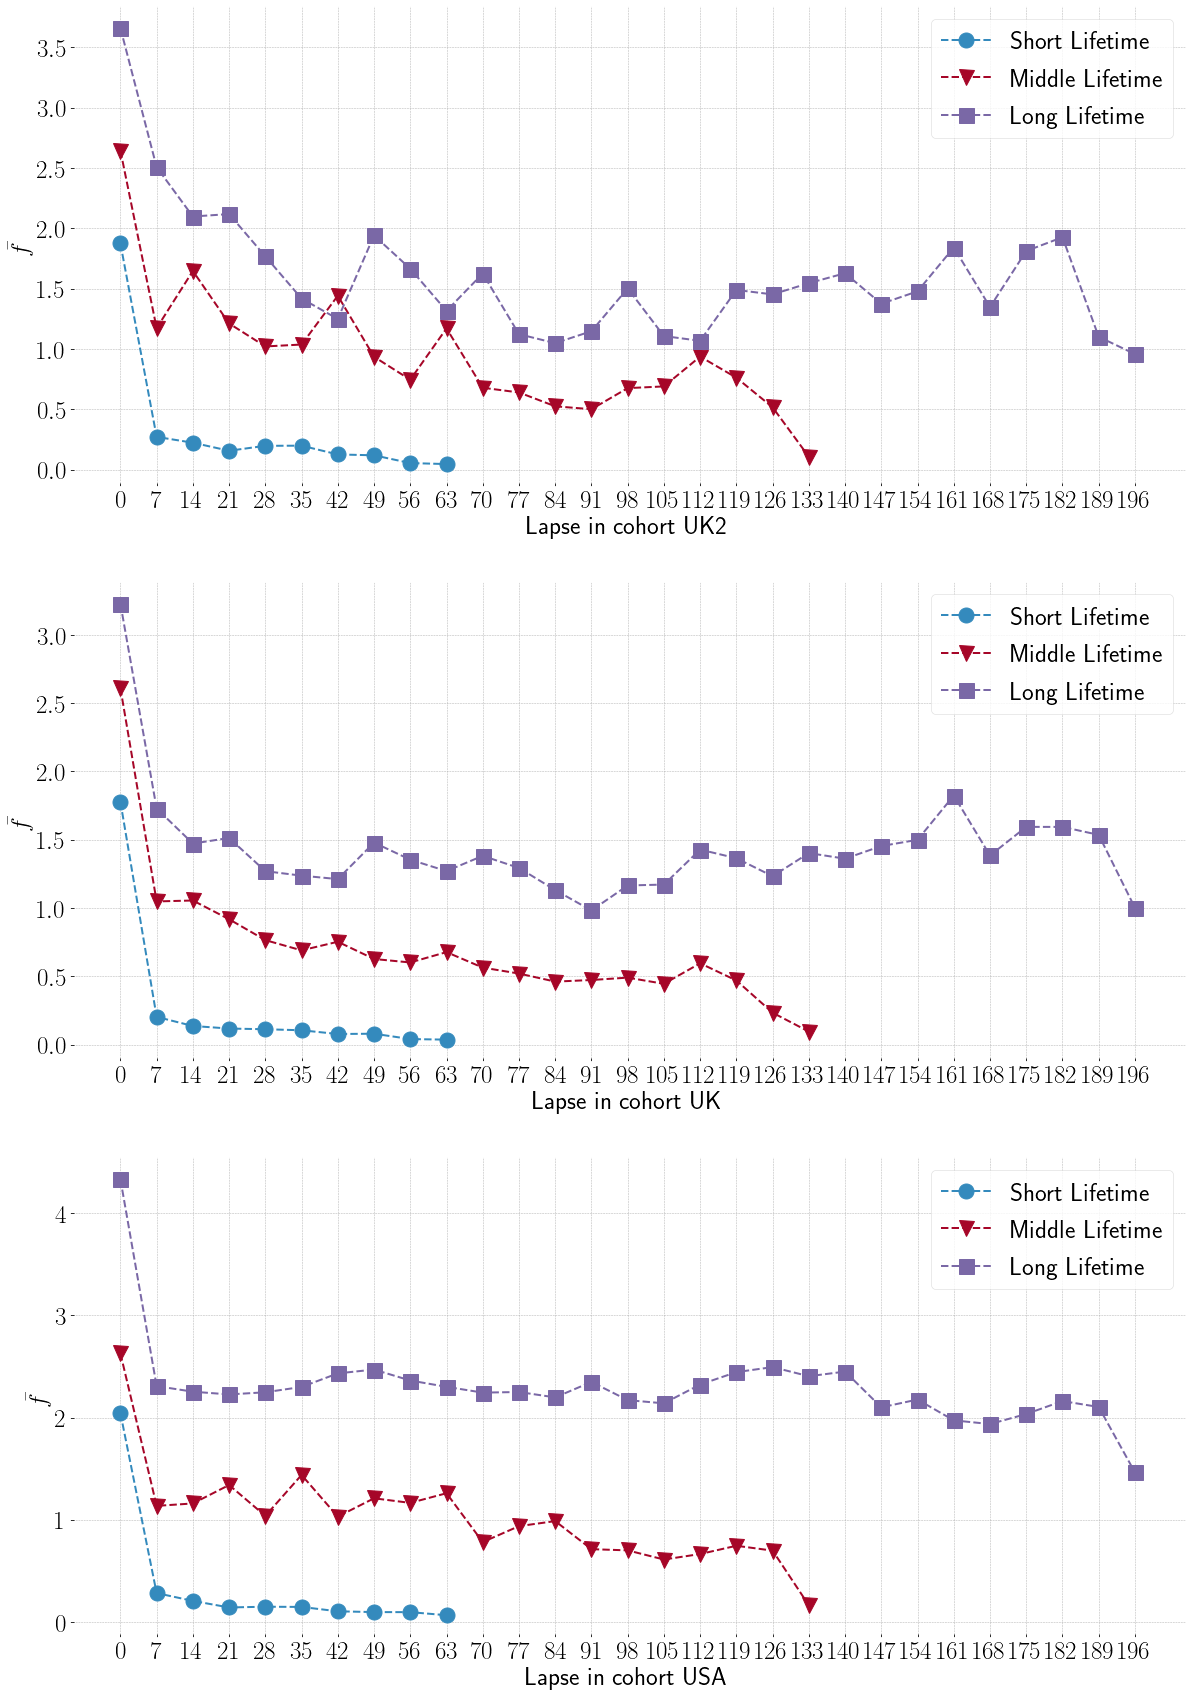

In [12]:
plt.figure(figsize=(20, 30))
p = 1
labels = ['Short Lifetime', 'Middle Lifetime', 'Long Lifetime']
cohorts = ['UK2', 'UK', 'USA', 'Italy']
for c in stablec.keys():
    plt.subplot(3,1,p)
    plt.xlabel(f"Lapse in cohort {cohorts[p - 1]}")
    plt.ylabel(r"$\bar{f}$")
    plt.xticks(range(0, 201, 7))
    for lamb in stablec[c].keys():
        l = int(lamb)
        plt.plot([7 * x for x in stablec[c][l].index], stablec[c][l]['alpha'], marker=markers[l], ls="--", markersize=15, label=labels[l])
    plt.legend()
    p += 1
    if p > 3:
        break
#plt.savefig("../commpatterns/img/supp/stablec.pdf", dpi=150)

In [13]:
df0 = stablec['uk2'][0].loc[(stablec['uk2'][0].index >= 1) & (stablec['uk2'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['uk2'][1].loc[(stablec['uk2'][1].index >= 1) & (stablec['uk2'][1].index <= 7)]
print(np.mean(df1['alpha']))
df2 = stablec['uk2'][2].loc[(stablec['uk2'][2].index >= 2) & (stablec['uk2'][2].index <= 12)]
print(np.mean(df2['alpha']))

0.21205999468040362
1.2088884361956773
1.578367777694499


In [14]:
df0 = stablec['uk'][0].loc[(stablec['uk'][0].index >= 1) & (stablec['uk'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['uk'][1].loc[(stablec['uk'][1].index >= 2) & (stablec['uk'][1].index <= 7)]
print(np.mean(df1['alpha']))
df2 = stablec['uk'][2].loc[(stablec['uk'][2].index >= 1) & (stablec['uk'][2].index <= 9)]
print(np.mean(df2['alpha']))

0.14210746893157875
0.8012445929488529
1.3929844592006027


In [15]:
df0 = stablec['mit'][0].loc[(stablec['mit'][0].index >= 1) & (stablec['mit'][0].index <= 4)]
print(np.mean(df0['alpha']))
df1 = stablec['mit'][1].loc[(stablec['mit'][1].index >= 2) & (stablec['mit'][1].index <= 5)]
print(np.mean(df1['alpha']))
df2 = stablec['mit'][2].loc[(stablec['mit'][2].index >= 1) & (stablec['mit'][2].index <= 12)]
print(np.mean(df2['alpha']))

0.19417925366311362
1.2436233858527386
2.299471868946596


In [16]:
for c in stablec.keys():
    for l in stablec[c].keys():
        print(l, pc.get_plateau(stablec[c][l], 0.8))
    print("=======================================")

0.0 (1.0, 9.0, 0.15465066459309426)
1.0 (7.0, 13.0, 0.7419267452281803)
2.0 (8.0, 20.0, 1.362306013646445)
0.0 (1.0, 9.0, 0.1006856972225063)
1.0 (3.0, 17.0, 0.6031980154854286)
2.0 (6.0, 22.0, 1.3050040249848212)
0.0 (1.0, 9.0, 0.14252274495677503)
1.0 (6.0, 14.0, 0.9756377179309674)
2.0 (1.0, 27.0, 2.253881045246292)


In [17]:
for c in stablec.keys():
    tmp = pd.DataFrame()
    for l in stablec[c].keys():
        df = stablec[c][l]
        df.columns = [f'l{int(l)}']
        if len(tmp) == 0:
            tmp = tmp.append(df)
        else:
            tmp = tmp.merge(df, left_index=True, right_index=True, how='outer')
    tmp.index.rename('a', inplace=True)
    tmp.fillna('nan', inplace=True)
    tmp.to_csv(f"../commpatterns/PNAS_paper/figs/fig2c_{c}.dat", header=True, sep="\t")

In [18]:
t0 = dt.datetime.now()
bplots = {}
for c in calls.keys():
    bplots[c] = {}
    for Dl in range(40, 71, 5):
        dff = pc.get_f(calls[c], 'all', 10, Dl)
        b = pc.get_b(dff, 'alpha')
        bplots[c][Dl] = pc.plot_g(b, 'alpha')

plateaus = {}
platplot = {}
for c in calls.keys():
    plateaus[c] = {}
    for Dl in [60, 65, 70]:
        for lamb in bplots[c][Dl].keys():
            ell = int((lamb + 0.5) * Dl)
            if ell not in plateaus[c].keys():
                xmin, xmax, height = pc.get_plateau(bplots[c][Dl][lamb], 0.8)
                plateaus[c][ell] = height
    
    platplot[c] = pd.DataFrame.from_dict(plateaus[c], orient='index').sort_index()
print(f'This block took {dt.datetime.now() - t0}')

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


This block took 0:03:35.083545


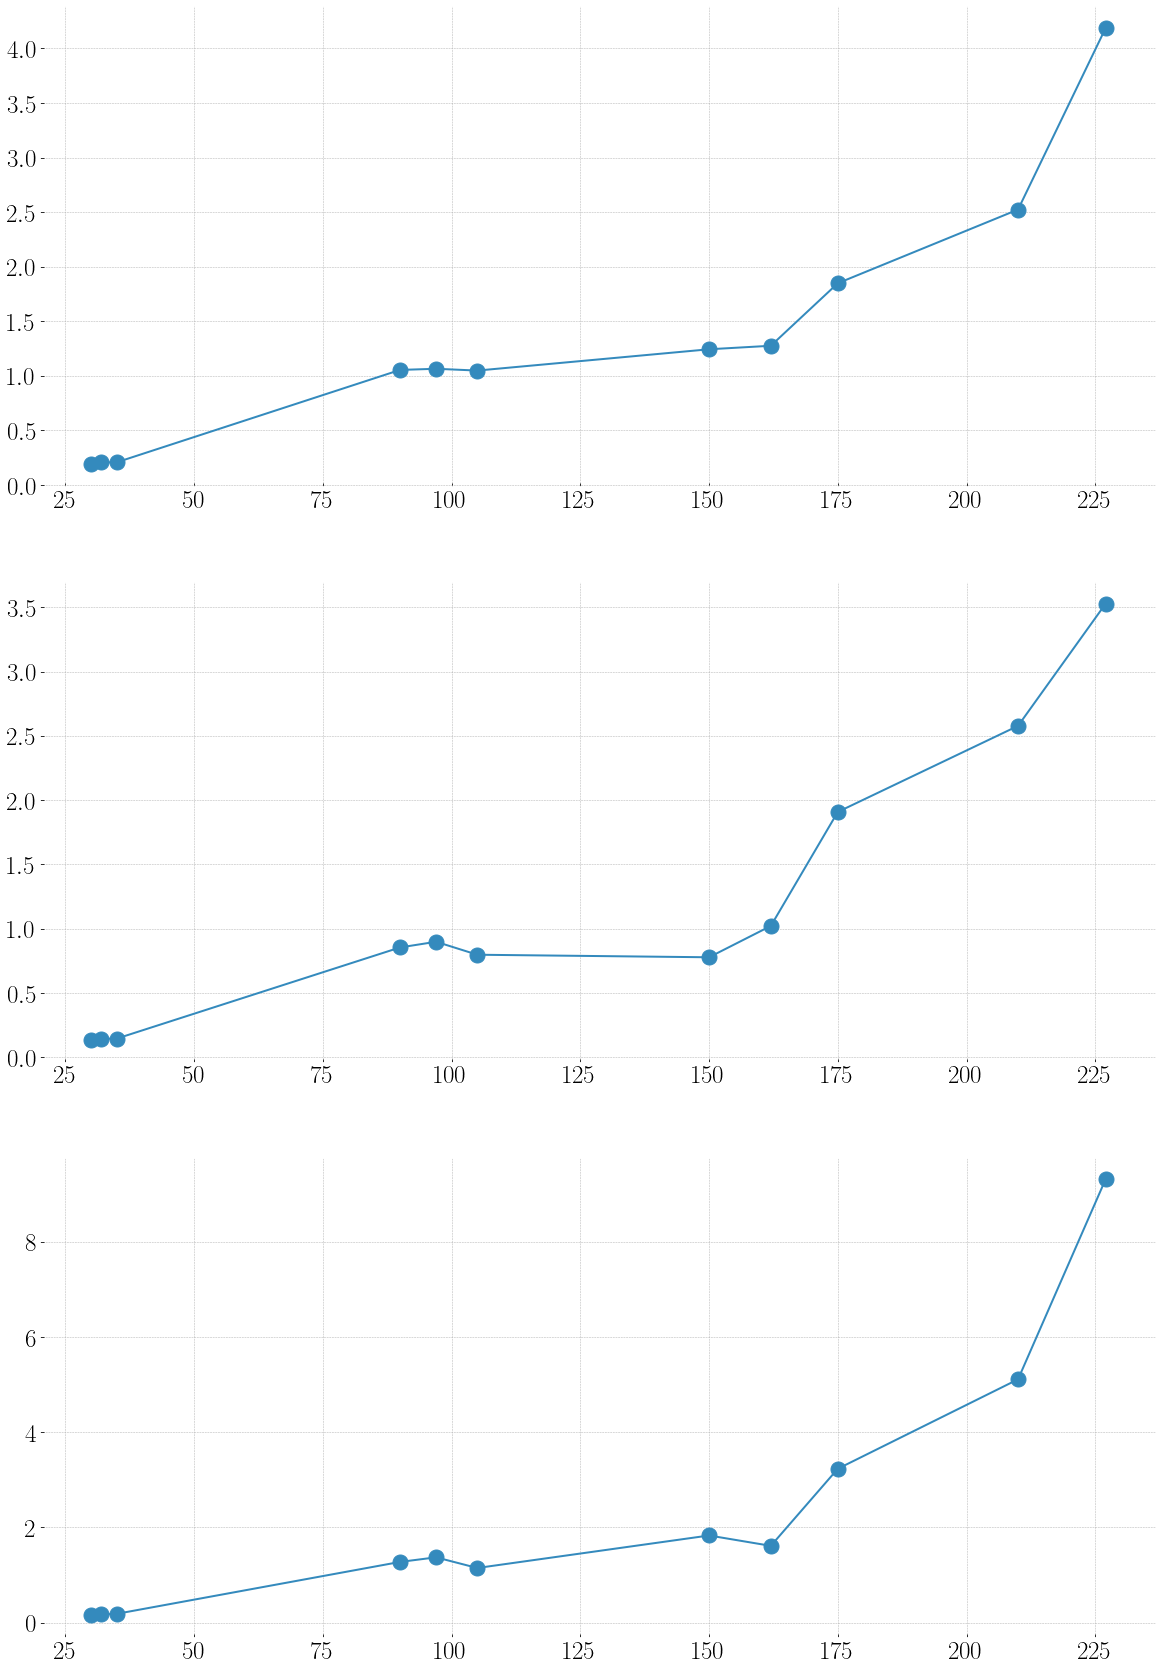

In [19]:
plt.figure(figsize=(20,30))
p = 1
for c in platplot.keys():
    plt.subplot(3,1,p)
    plt.plot(platplot[c].index, platplot[c][0], "o-", markersize=15)
    p += 1

In [20]:
tmp = pd.DataFrame()
tmp['ell'] = list(platplot['uk'].index)
for c in platplot.keys():
    tmp[f'{c}'] = list(platplot[c][0])
tmp.to_csv("../commpatterns/PNAS_paper/figs/inset2b.dat", header=True, index=False, sep="\t")

In [21]:
platplot['uk2'][0]

30     0.190787
32     0.206926
35     0.208543
90     1.054666
97     1.065211
105    1.048733
150    1.243906
162    1.276076
175    1.848824
210    2.524145
227    4.186259
Name: 0, dtype: float64

In [22]:
# alldff2 = {}
# for c in calls.keys():
#     alldff2[c] = pc.get_f(calls[c], 'all', 30, 10)
    
# with open('../itdata/mtl1_lambda_alpha_fig2.pickle', 'rb') as handle:
#     it1 = pickle.load(handle)
#     handle.close()
    
# with open('../itdata/mtl2_lambda_alpha_fig2.pickle', 'rb') as handle:
#     it2 = pickle.load(handle)
#     handle.close()
    
# alldff2['it'] = {}
# data = [it1, it2]
# dname = ['it1', 'it2']
# for c in range(2):
#     for ego in data[c].keys():
#         key = f'{dname[c]}{ego}'
#         alldff2['it'][key] = data[c][ego]
        
# survc = {}
# for c in alldff2.keys():
#     survc[c] = pc.get_survival(alldff2[c])

In [23]:
# plt.figure(figsize=(20, 30))
# p = 1
# for c in survc.keys():
#     plt.subplot(3, 1, p)
#     plt.xlabel(f"Lifetime for cohort {cohorts[p - 1]}")
#     plt.ylabel("Survival Probability")
#     df = survc[c]
#     for gamma in range(5):
#         plt.plot([10 * x for x in df[gamma].index], df[gamma][0], marker=markers[gamma], markersize=13, ls="--", lw=3, label=fr'$\gamma = {gamma}$')
#     plt.legend()
#     p += 1
# #plt.savefig("../commpatterns/img/supp/survc.pdf", dpi=150)

In [24]:
# for c in survc.keys():
#     tmp = pd.DataFrame({'lc': list(survc[c][0].index)})
#     for s in range(5):
#         df = survc[c][s]
#         tmp[f'p{int(s)}'] = df[0]
#     tmp.to_csv(f'../commpatterns/PNAS_paper/SI/figs/s4_{c}.dat', header=False, index=False, sep="\t")

# Interevent times for each cohort

Consider this needs to be updated after the new filters (i.e. including the first 30 days of phone calls). Just to document the way I will compute the interevent times:

1. For each ego-alter pair, obtain the time (in days) between each phone call. Generate a list with the interevent times.
2. For each ego, average the coefficients of variation and put them into a cohort list
3. For each cohort, I should have a list of size equal to the number of egos, with all of the average coefficients of variation. Once again, if I take the average I will get the coefficient of variation for the cohort.

I can try a slight variation of this by not doing step 2 and get an average for all ego-alter pairs in the cohort. I can try to identify differences in both methods.

In [ ]:
# ie = {}
# df = calls
# for ego in df['ego'].unique():
#     df1 = df.loc[df['ego'] == ego]
#     elllist = df1.groupby('alter')[['aclock']].max()
#     for alter in df1['alter'].unique():
#         lamb = elllist['aclock'][alter] // 67
#         df2 = df1.loc[df1['alter'] == alter]
#         ie[lamb] = ie.get(lamb, [])
#         ielist = list(df2['aclock'].diff())[1:]
#         if len(ielist) > 2:
#             cvar = np.nanstd(ielist) / np.nanmean(ielist)
#             if not pd.isna(cvar):
#                 ie[lamb].append(cvar)

In [67]:
def get_ietimes(callsdf, Deltaell = 67):
    df = callsdf
    iebyego = {}
    ieegoalter = {}
    ieegoalter['all'] = []
    for ego in df['ego'].unique():
        df1 = df.loc[df['ego'] == ego]
        elllist = df1.groupby('alter')[['aclock']].max()
        iebyego[ego] = {}
        iebyego[ego]['all'] = []
        for alter in df1['alter'].unique():
            lamb = elllist['aclock'][alter] // Deltaell
            df2 = df1.loc[df1['alter'] == alter]
            ielist = list(df2['aclock'].diff())[1:]
            ieegoalter[lamb] = ieegoalter.get(lamb, [])
            if len(ielist) > 2:
                cvar = np.nanstd(ielist) / np.nanmean(ielist)
                if not pd.isna(cvar):
                    ieegoalter[lamb].append(cvar)
                    ieegoalter['all'].append(cvar)
                    iebyego[ego][lamb] = iebyego[ego].get(lamb, [])
                    iebyego[ego][lamb].append(cvar)
                    iebyego[ego]['all'].append(cvar)
    result = {}
    result['byego'] = iebyego
    result['egoalter'] = {}
    for lamb in ieegoalter.keys():
        result['egoalter'][lamb] = ieegoalter[lamb]
    return result

In [68]:
tmp1 = get_ietimes(calls['mit'])

<ipython-input-67-95321b100411>:17: RuntimeWarning: invalid value encountered in double_scalars
  cvar = np.nanstd(ielist) / np.nanmean(ielist)


In [71]:
(tmp1['byego'])

{'fa10-01-19': {'all': [2.947281279781209,
   0.9541764380328825,
   1.664007085474601,
   1.7815373789303304,
   0.6875966227711262,
   1.3274228653096516,
   1.720003516943694,
   0.7168378673421907,
   1.9437700067186479,
   1.7320508075688774,
   1.4142135623730951,
   2.0169326221651542,
   1.4858520224729583,
   1.4264424741384467,
   1.700161123288743,
   1.0237525187643415,
   1.6891417939296867,
   1.818378398463862,
   2.3393667863944745,
   1.3898607710713196,
   2.7123407520759444,
   1.9513498517058396,
   2.209072203437452,
   1.2173801331092964,
   2.1165183675083004,
   1.4179550780192551,
   1.243507852300956,
   1.3054047773212192],
  2: [2.947281279781209,
   0.9541764380328825,
   1.664007085474601,
   1.7815373789303304,
   1.3274228653096516,
   0.7168378673421907,
   1.9437700067186479,
   1.7320508075688774,
   2.0169326221651542,
   1.4264424741384467,
   1.700161123288743,
   1.0237525187643415,
   1.6891417939296867,
   1.818378398463862,
   2.339366786394474

In [62]:
(tmp1['byego']['all'])

[]

In [61]:
tmp1['hhh']

{'fa10-01-19': {'all': [2.947281279781209,
   0.9541764380328825,
   1.664007085474601,
   1.7815373789303304,
   0.6875966227711262,
   1.3274228653096516,
   1.720003516943694,
   0.7168378673421907,
   1.9437700067186479,
   1.7320508075688774,
   1.4142135623730951,
   2.0169326221651542,
   1.4858520224729583,
   1.4264424741384467,
   1.700161123288743,
   1.0237525187643415,
   1.6891417939296867,
   1.818378398463862,
   2.3393667863944745,
   1.3898607710713196,
   2.7123407520759444,
   1.9513498517058396,
   2.209072203437452,
   1.2173801331092964,
   2.1165183675083004,
   1.4179550780192551,
   1.243507852300956,
   1.3054047773212192],
  2: [2.947281279781209,
   0.9541764380328825,
   1.664007085474601,
   1.7815373789303304,
   1.3274228653096516,
   0.7168378673421907,
   1.9437700067186479,
   1.7320508075688774,
   2.0169326221651542,
   1.4264424741384467,
   1.700161123288743,
   1.0237525187643415,
   1.6891417939296867,
   1.818378398463862,
   2.339366786394474